In [9]:
import requests
from bs4 import BeautifulSoup

def fetch_dishes():
    url = "https://ru.wikipedia.org/wiki/Категория:Блюда_по_алфавиту"
    dishes = []
    
    while url:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        dishes.extend(link.text for link in soup.select('.mw-category-group ul li a'))
        
        next_page = soup.select_one('a:contains("Следующая страница")')
        url = "https://ru.wikipedia.org" + next_page['href'] if next_page else None
    
    print(dishes)
    return dishes

dishes = fetch_dishes()


['Абон', 'Абрикосовые клёцки', 'Абхазури', 'Авголемоно', 'Агнес Бернауэр (торт)', 'Агуапанела', 'Агуачиле', 'Агэмоти', 'Аджапсандали', 'Аджика', 'Аджилы эзме', 'Адобо (филиппинская кухня)', 'Азу', 'Айвар', 'Айвовый мармелад', 'Айвовый хлеб', 'Айнтопф', 'Айоли', 'Айсбайн', 'Аканес', 'Акараже', 'Аквакотта', 'Аки и солёная рыба', 'Акутак', 'Алани', 'Алетрия', 'Алиго', 'Алйотта', 'Аль пастор', 'Альба (блюдо)', 'Альмогроте', 'Альфахор', 'Альята', 'Аманатто', 'Амаретто (печенье)', 'Амасти', 'Аматричана', 'Американское парфе', 'Амич', 'Аммицу', 'Ампо (блюдо)', 'Ан-пан', 'Ангелы на лошадях', 'Английский крем', 'Английский маффин', 'Английский пирог с миногами', 'Ангулас', 'Андалузский соус', 'Андуйет', 'Анзак (печенье)', 'Анис де Флавиньи', 'Анковский пирог', 'Аннин-тофу', 'Антикучо', 'Антипасто', 'Антрекот', 'Аньолотти', 'Аодзиру', 'Апио (блюдо)', 'Апфелькюхле', 'Аранчини', 'Арахисовое рагу', 'Арахисовый пирог', 'Арахисовый соус', 'Арахисовый суп', 'Арем-арем', 'Арепа', 'Аризонский чиз-крисп'

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

def fetch_yandex_links_with_selenium():
    cities = ["Москва", "Санкт-Петербург", "Казань", "Уфа", "Новосибирск", "Хабаровск", "Петрозаводск", "Карелия"]
    driver = webdriver.Chrome() 

    city_links = {}  
    for city in cities:
        query = f"блюда {city}"
        # time.sleep(15)

        driver.get("https://ya.ru/")
        
        # Ввод запроса в поле поиска
        search_box = driver.find_element(By.NAME, "text")
        search_box.send_keys(query)
        search_box.send_keys(Keys.RETURN)
        
        time.sleep(3)
        
        links = driver.find_elements(By.CSS_SELECTOR, "a.Link.organic__url")[:10]
        # print(f"Ссылки для города {city}:")
        city_links[city] = [link.get_attribute("href") for link in links]

    
    driver.quit()

    return city_links

links_dict = fetch_yandex_links_with_selenium()
links_dict


{'Москва': ['https://yamoscow.ru/baza-znanij/tradicionnye-blyuda-moskvy/',
  'https://dzen.ru/a/Xdr6DgXd4n-NPAkW',
  'https://yabs.yandex.ru/count/WryejI_zOoVX2Lcg18qQ07FhfCsumRqc1Bmc6fLAfLAf1C44VJwNEtkstxdpXZjVl-FrXZlSeQ0RFpT2s2LkX2ZnSoF4pyyD9EkI23yqZ4AKKB8cLQa_IaGXfayGpXGv21i521-xnqOHdVg0SA80uPGwJqHp43OA4CxdqvRE24AYMfFk6jGRGaZK8g6X9HeoYeHe61a5qJ3oWT8uilf0GJodpgVJ6RNj4j3SENq-STo6GalWzvrFez9dD1grIzn0Iqa_IaGXbf16s41BIJzAH5Qa452fr9RQJwajTKwbELJgd3hj4bKX6KP39d2eqWoaAuaW4ZIGbCGxOChc0Kz6eEgIAfLDAKv098Kmw3WAPSbeswmXabbqjZxA6ryIxXSlP5mUo2efGFj0bgy0xGFP90Le7yZg5Q1LiSGivsjYye4HfYAiPULqao2r7852Q-fG3Qbp2dtUJgdjX4PlN1g5tjFQTaQVqIWKUkDHwNrBRGbmi9uCLxZZp3mL9Ep6ExEL7UT5wSfztUm_VdO8wSGuds-ORBnLczq7jcq01x21IoA8aSIeS9mPLwjXRyPnsMarREcfchB7SYDoM2Fce0DHxR7HaGwEXkjfjWzaamImnG1Mn7QInL7yX0gBjR1rGDUPPiXqM8Ko2AalCUIcZz6l68uS6G6lASLMG-93HeU9RkejovhSQdEdi2FxmmRqSJzuQQNzNo_rzBrUwkbp_TZYtokWFVbQ9fZZppB179bcPfGpiyoCSewIjIDncOsXKzD2jzHb7DNusEX6cXvBy2EItYNu4KblQIzVzcIDM1mzsIivVyT-J7im0b5UkcR_pM5rvUxFRsbTroMjhjpzUQqFx

In [13]:
import spacy

nlp = spacy.load('ru_core_news_sm')
def lemmatize_text(text):
    doc = nlp(text)
    return set([token.lemma_ for token in doc if token.pos_ in ('NOUN', 'PROPN')])

In [14]:
def split_text(text):
    sentences = text.split(' ')

    chunks = []
    current_chunk = []
    current_length = 0

    for word in sentences:
        current_chunk.append(word)
        current_length += len(word)
        
        if current_length > 10000:
            chunks.append(' '.join(current_chunk))
            current_chunk = []
            current_length = 0

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

In [15]:
def fetch_page(url, retries=3, timeout=20):
    for attempt in range(retries):
        try:
            response = requests.get(url, timeout=timeout)
            response.raise_for_status()
            return response
        except requests.exceptions.Timeout:
            print(f"Попытка {attempt + 1} не удалась из-за тайм-аута.")
            time.sleep(2)
        except requests.exceptions.RequestException as e:
            print(f"Ошибка запроса: {e}")
            break
    return None

In [16]:
def find_dishes_in_page(url, dishes):
    response = fetch_page(url)
    if response is None:
        print(f"Ошибка при получении данных с {url}")
        return {}

    soup = BeautifulSoup(response.text, 'html.parser')
    page_text = soup.get_text()

    text_chunks = split_text(page_text)

    lemmatized_text = set()
    for chunk in text_chunks:
        lemmatized_text.update(lemmatize_text(chunk))

    dish_counts = {dish: 0 for dish in dishes}

    for dish in dishes:
        dish_lemma = lemmatize_text(dish)
        if dish_lemma.intersection(lemmatized_text):
            dish_counts[dish] += 1

    return dish_counts

In [17]:
def normalize_frequencies(dish_counts, total_pages):
    normalized_frequencies = {dish: count / total_pages if total_pages > 0 else 0
                              for dish, count in dish_counts.items()}
    return normalized_frequencies

In [18]:
def process_city_links(city_links, dishes):
    city_dishes = {}
    for city, links in city_links.items():
        print(f"Обработка данных для города: {city}")
        dish_counts = {dish: 0 for dish in dishes}

        for link in links:
            print(f"Обработка страницы: {link}")
            page_dish_counts = find_dishes_in_page(link, dishes)
            for dish, count in page_dish_counts.items():
                dish_counts[dish] += count

        normalized_frequencies = normalize_frequencies(dish_counts, len(links))
        city_dishes[city] = normalized_frequencies

    return city_dishes

In [19]:
city_dishes = {}
city_dishes = process_city_links(links_dict, dishes)
city_dishes

Обработка данных для города: Москва
Обработка страницы: https://yamoscow.ru/baza-znanij/tradicionnye-blyuda-moskvy/
Обработка страницы: https://dzen.ru/a/Xdr6DgXd4n-NPAkW
Обработка страницы: https://yabs.yandex.ru/count/WryejI_zOoVX2Lcg18qQ07FhfCsumRqc1Bmc6fLAfLAf1C44VJwNEtkstxdpXZjVl-FrXZlSeQ0RFpT2s2LkX2ZnSoF4pyyD9EkI23yqZ4AKKB8cLQa_IaGXfayGpXGv21i521-xnqOHdVg0SA80uPGwJqHp43OA4CxdqvRE24AYMfFk6jGRGaZK8g6X9HeoYeHe61a5qJ3oWT8uilf0GJodpgVJ6RNj4j3SENq-STo6GalWzvrFez9dD1grIzn0Iqa_IaGXbf16s41BIJzAH5Qa452fr9RQJwajTKwbELJgd3hj4bKX6KP39d2eqWoaAuaW4ZIGbCGxOChc0Kz6eEgIAfLDAKv098Kmw3WAPSbeswmXabbqjZxA6ryIxXSlP5mUo2efGFj0bgy0xGFP90Le7yZg5Q1LiSGivsjYye4HfYAiPULqao2r7852Q-fG3Qbp2dtUJgdjX4PlN1g5tjFQTaQVqIWKUkDHwNrBRGbmi9uCLxZZp3mL9Ep6ExEL7UT5wSfztUm_VdO8wSGuds-ORBnLczq7jcq01x21IoA8aSIeS9mPLwjXRyPnsMarREcfchB7SYDoM2Fce0DHxR7HaGwEXkjfjWzaamImnG1Mn7QInL7yX0gBjR1rGDUPPiXqM8Ko2AalCUIcZz6l68uS6G6lASLMG-93HeU9RkejovhSQdEdi2FxmmRqSJzuQQNzNo_rzBrUwkbp_TZYtokWFVbQ9fZZppB179bcPfGpiyoCSewIjIDncOsXKzD2jzHb7DNusEX6

{'Москва': {'Абон': 0.0,
  'Абрикосовые клёцки': 0.0,
  'Абхазури': 0.0,
  'Авголемоно': 0.0,
  'Агнес Бернауэр (торт)': 0.2,
  'Агуапанела': 0.0,
  'Агуачиле': 0.0,
  'Агэмоти': 0.0,
  'Аджапсандали': 0.0,
  'Аджика': 0.0,
  'Аджилы эзме': 0.0,
  'Адобо (филиппинская кухня)': 0.8,
  'Азу': 0.0,
  'Айвар': 0.0,
  'Айвовый мармелад': 0.0,
  'Айвовый хлеб': 0.2,
  'Айнтопф': 0.0,
  'Айоли': 0.0,
  'Айсбайн': 0.0,
  'Аканес': 0.0,
  'Акараже': 0.0,
  'Аквакотта': 0.0,
  'Аки и солёная рыба': 0.7,
  'Акутак': 0.0,
  'Алани': 0.0,
  'Алетрия': 0.0,
  'Алиго': 0.0,
  'Алйотта': 0.0,
  'Аль пастор': 0.1,
  'Альба (блюдо)': 0.9,
  'Альмогроте': 0.0,
  'Альфахор': 0.0,
  'Альята': 0.0,
  'Аманатто': 0.0,
  'Амаретто (печенье)': 0.1,
  'Амасти': 0.0,
  'Аматричана': 0.0,
  'Американское парфе': 0.0,
  'Амич': 0.0,
  'Аммицу': 0.0,
  'Ампо (блюдо)': 0.9,
  'Ан-пан': 0.9,
  'Ангелы на лошадях': 0.0,
  'Английский крем': 0.3,
  'Английский маффин': 0.1,
  'Английский пирог с миногами': 0.1,
  'Ангу

In [ ]:
import pandas as pd

city_vectors = pd.DataFrame(city_dishes).T.fillna(0)
city_vectors

,Абон,Абрикосовые клёцки,Абхазури,Авголемоно,Агнес Бернауэр (торт),Агуапанела,Агуачиле,Агэмоти,Аджапсандали,Аджика,...,Яхния,Яцухаси,Ячневая каша,Blote billetjes in het gras,Cocio,Cup Noodles,Jelly Babies,LPG-пирог,Mon Chéri,Сиратаки
Москва,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.9,0.0,0.0
Санкт-Петербург,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.8,0.0,0.0
Казань,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.7,0.0,0.0
Уфа,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.7,0.0,0.0
Новосибирск,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.7,0.0,0.0
Хабаровск,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
Петрозаводск,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.5,0.0,0.0
Карелия,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.9,0.0,0.0


In [28]:
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering

n_clusters = 4

# K-средних
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
city_vectors['kmeans_cluster'] = kmeans.fit_predict(city_vectors)

# Иерархическая кластеризация
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
city_vectors['hierarchical_cluster'] = agg_clustering.fit_predict(city_vectors)

# Спектральная кластеризация
spectral_clustering = SpectralClustering(n_clusters=n_clusters, random_state=0, affinity='nearest_neighbors', n_neighbors=3)
city_vectors['spectral_cluster'] = spectral_clustering.fit_predict(city_vectors)

print("Результаты кластеризации:\n")
print(city_vectors[['kmeans_cluster', 'hierarchical_cluster', 'spectral_cluster']])

Результаты кластеризации:

                 kmeans_cluster  hierarchical_cluster  spectral_cluster
Москва                        3                     3                 0
Санкт-Петербург               2                     0                 2
Казань                        1                     0                 2
Уфа                           1                     0                 2
Новосибирск                   0                     2                 1
Хабаровск                     0                     2                 1
Петрозаводск                  1                     2                 3
Карелия                       3                     1                 0


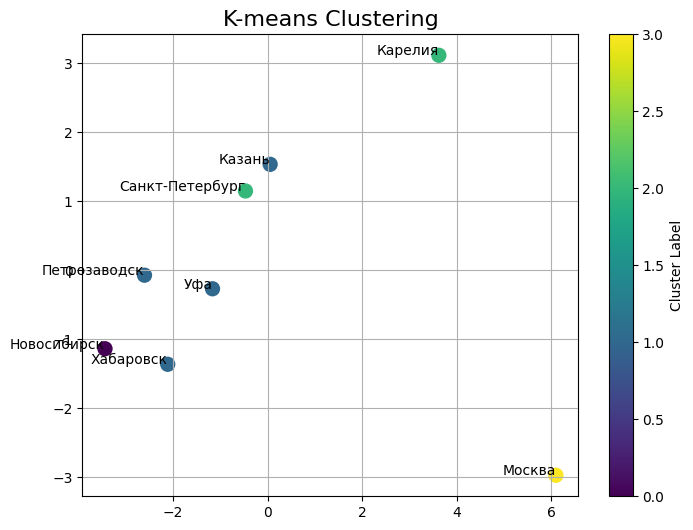

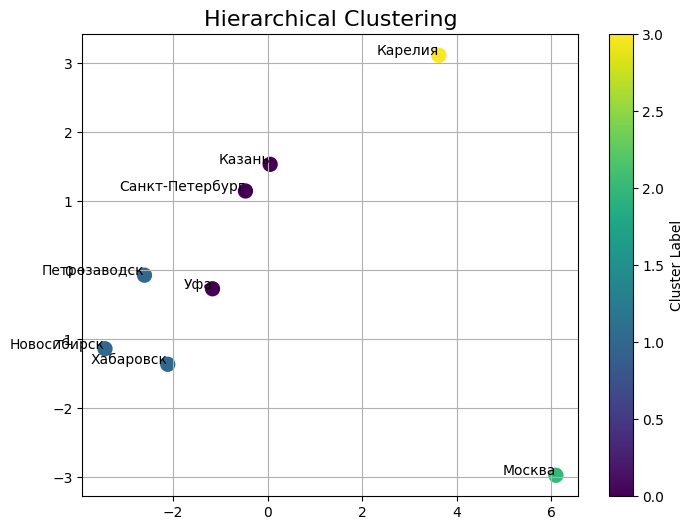

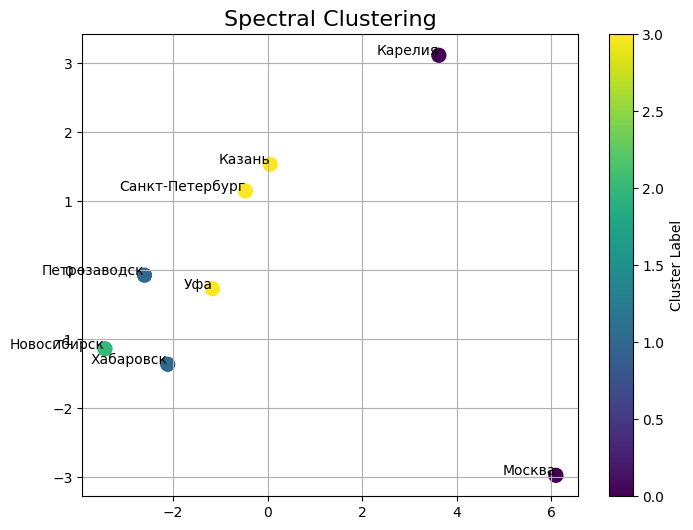

In [27]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(city_vectors.drop(columns=['kmeans_cluster', 'hierarchical_cluster', 'spectral_cluster']))

def plot_clusters(reduced_data, labels, title, cities):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=100)
    plt.title(title, fontsize=16)
    for i, city in enumerate(cities):
        plt.text(reduced_data[i, 0], reduced_data[i, 1], city, fontsize=10, ha='right')
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.show()

plot_clusters(reduced_data, city_vectors['kmeans_cluster'], 'K-means Clustering', city_vectors.index)
plot_clusters(reduced_data, city_vectors['hierarchical_cluster'], 'Hierarchical Clustering', city_vectors.index)
plot_clusters(reduced_data, city_vectors['spectral_cluster'], 'Spectral Clustering', city_vectors.index)
